In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Common imports
import numpy as np
import pandas as pd
import os
import time 
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
#Reading The Data File
PATH_TO_DATA ='/content/drive/MyDrive/Colab Notebooks/sonar.all-data'
df = pd.read_csv(PATH_TO_DATA,header=None)
Data=df.values
n=Data.shape[1]
# split into input (X) and output (Y) variables
#X = Data[:,0:60].astype(float)
X = Data[:,:n-1]
Y = Data[:,-1]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y).astype(float)
XScaler = MinMaxScaler().fit(X);
X_new1  = XScaler.transform(X)

In [3]:
from sklearn.decomposition import PCA
imput_numb=30   #This should be set
start1=time.time()
pca = PCA(n_components=imput_numb)
X_new=pca.fit_transform(X_new1)
end1=time.time()
PCA_time=end1-start1
PCA_time

0.0398859977722168

# Evaluating

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_new, encoded_Y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
#Normalising The data
xScaler = MinMaxScaler().fit(X_train);
X_train = xScaler.transform(X_train)
X_test  = xScaler.transform(X_test)
X_val  = xScaler.transform(X_val)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_val=y_val.reshape(-1,1)

In [6]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(imput_numb,)))	#Hidden Layer 1
model.add(Dense(256, activation='relu'))	#Hidden Layer 2
model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
model.summary()

# Configure the Network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                620       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               5376      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 6,253
Trainable params: 6,253
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
4/4 [==============================] - 1s 167ms/step - loss: 0.6879 - accuracy: 0.5460 - val_loss: 0.6861 - val_accuracy: 0.5625
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6806 - accuracy: 0.5650 - val_loss: 0.6821 - val_accuracy: 0.5625
Epoch 3/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6788 - accuracy: 0.6457 - val_loss: 0.6750 - val_accuracy: 0.8125
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6731 - accuracy: 0.7098 - val_loss: 0.6712 - val_accuracy: 0.8125
Epoch 5/30
4/4 [==============================] - 0s 14ms/step - loss: 0.6700 - accuracy: 0.7141 - val_loss: 0.6629 - val_accuracy: 0.7188
Epoch 6/30
4/4 [==============================] - 0s 14ms/step - loss: 0.6651 - accuracy: 0.7529 - val_loss: 0.6563 - val_accuracy: 0.6875
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 0.6590 - accuracy: 0.7416 - val_loss: 0.6511 - val_accuracy: 0.7188
Epoch 8/30
4/4 [==========

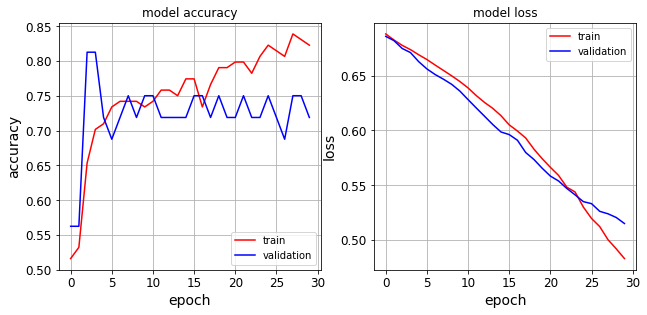

In [7]:
# history = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.2)
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=30, batch_size=32)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure(figsize=(16,10))
plt.subplot(231)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
plt.subplot(232)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

2/2 [==============================] - 0s 7ms/step - loss: 0.5293 - accuracy: 0.7308
Test Loss 0.5293273329734802
Test Accuracy 0.7307692170143127
confusion matrix=
 [[19 11]
 [ 3 19]]
              precision    recall  f1-score   support

         0.0       0.86      0.63      0.73        30
         1.0       0.63      0.86      0.73        22

    accuracy                           0.73        52
   macro avg       0.75      0.75      0.73        52
weighted avg       0.77      0.73      0.73        52



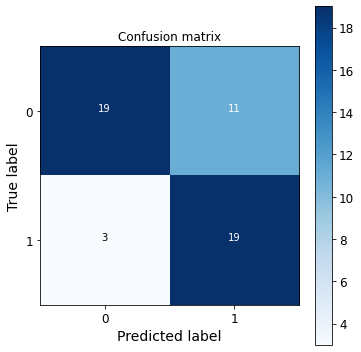

In [8]:
# Prediction Labels
Y_pred = model.predict(X_test)


#Initial a threshhold for last layer
y_pred=np.zeros(len(Y_pred))
for i in range(len(y_pred)):
  if Y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

# correct_indices = np.nonzero(y_pred == y_test)[0]
# incorrect_indices = np.nonzero(y_pred != y_test)[0]

# print(" classified correctly", len(correct_indices))
# print(" classified incorrectly", len(incorrect_indices))

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

print(classification_report(y_test,y_pred))



# Auto Encoder

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, encoded_Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#Normalising The data
xScaler = MinMaxScaler().fit(X_train);
yScaler = MinMaxScaler().fit(y_train.reshape(-1, 1));
X_train = xScaler.transform(X_train)
X_test  = xScaler.transform(X_test)
X_val  = xScaler.transform(X_val)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_val=y_val.reshape(-1,1)

import keras
from keras import layers
# This is the size of our encoded representations
encoding_dim = imput_numb      # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
encoder_input = keras.Input(shape=(60,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(50, activation='relu')(encoder_input)
#Add a second hiden layer
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(60, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(encoder_input, decoded)
encoder = keras.Model(encoder_input, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

autoencoder.fit(X_train, X_train,
                epochs=25,
                batch_size=50,
                validation_data=(X_val, X_val))

Epoch 1/25
3/3 [==============================] - 1s 86ms/step - loss: 0.7008 - accuracy: 0.0063 - val_loss: 0.6939 - val_accuracy: 0.0000e+00
Epoch 2/25
3/3 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.0000e+00 - val_loss: 0.6881 - val_accuracy: 0.0294
Epoch 3/25
3/3 [==============================] - 0s 24ms/step - loss: 0.6876 - accuracy: 0.0000e+00 - val_loss: 0.6837 - val_accuracy: 0.0294
Epoch 4/25
3/3 [==============================] - 0s 24ms/step - loss: 0.6832 - accuracy: 0.0000e+00 - val_loss: 0.6799 - val_accuracy: 0.0000e+00
Epoch 5/25
3/3 [==============================] - 0s 23ms/step - loss: 0.6791 - accuracy: 0.0063 - val_loss: 0.6756 - val_accuracy: 0.0000e+00
Epoch 6/25
3/3 [==============================] - 0s 27ms/step - loss: 0.6744 - accuracy: 0.0101 - val_loss: 0.6708 - val_accuracy: 0.0000e+00
Epoch 7/25
3/3 [==============================] - 0s 24ms/step - loss: 0.6687 - accuracy: 0.0101 - val_loss: 0.6657 - val_accuracy: 0.0000

In [10]:
# encoded_imgs = encoder.predict(X_test)
# decoded_imgs = decoder.predict(encoded_imgs)
# [test_loss, test_acc] = autoencoder.evaluate(X_test, X_test)
# print("Test Loss", test_loss)
# print("Test Accuracy", test_acc)
# decoded_imgs[5,:],X_test[5,:]
X_test = encoder.predict(X_test)
X_train = encoder.predict(X_train)
X_val = encoder.predict(X_val)

In [11]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

model1 = Sequential()
model1.add(Dense(imput_numb, activation='relu', input_shape=(imput_numb,)))	#Hidden Layer 1
model1.add(Dense(256, activation='relu'))	#Hidden Layer 2
model1.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
model1.summary()

# Configure the Network
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               7936      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
5/5 [==============================] - 1s 49ms/step - loss: 0.6902 - accuracy: 0.5323 - val_loss: 0.6882 - val_accuracy: 0.5588
Epoch 2/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6858 - accuracy: 0.5810 - val_loss: 0.6828 - val_accuracy: 0.5294
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.6837 - accuracy: 0.5661 - val_loss: 0.6778 - val_accuracy: 0.7059
Epoch 4/20
5/5 [==============================] - 0s 14ms/step - loss: 0.6726 - accuracy: 0.7309 - val_loss: 0.6786 - val_accuracy: 0.4706
Epoch 5/20
5/5 [==============================] - 0s 17ms/step - loss: 0.6692 - accuracy: 0.5443 - val_loss: 0.6812 - val_accuracy: 0.4706
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6759 - accuracy: 0.5383 - val_loss: 0.6733 - val_accuracy: 0.5294
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.6561 - accuracy: 0.6534 - val_loss: 0.6701 - val_accuracy: 0.5294
Epoch 8/20
5/5 [===========

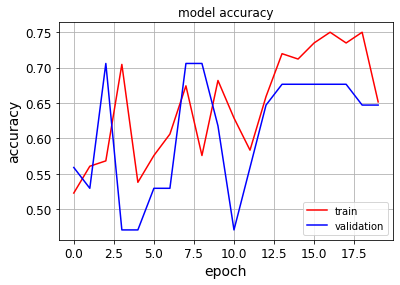

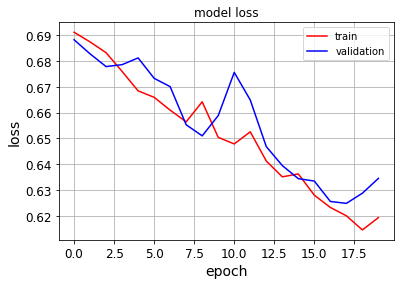

In [12]:
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=20, batch_size=32)
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
# Plotting Metrics
# Plot the Accuracy Curves
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

In [15]:
# # Prediction Labels
# Y_pred = model.predict(X_test)


# #Initial a threshhold for last layer
# y_pred=np.zeros(len(Y_pred))
# for i in range(len(y_pred)):
#   if Y_pred[i]>0.5:
#     y_pred[i]=1
#   else:
#     y_pred[i]=0


# # Evaluate the trained model
# [test_loss, test_acc] = model.evaluate(X_test, y_test)
# print("Test Loss", test_loss)
# print("Test Accuracy", test_acc)

# # correct_indices = np.nonzero(y_pred == y_test)[0]
# # incorrect_indices = np.nonzero(y_pred != y_test)[0]

# # print(" classified correctly", len(correct_indices))
# # print(" classified incorrectly", len(incorrect_indices))

# from sklearn.metrics import confusion_matrix , classification_report
# # Confusion Matrix
# class_names=[0,1]
# confusion_mtx = confusion_matrix(y_test, y_pred)
# print("confusion matrix=\n",confusion_mtx)

# import itertools
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     plt.figure(figsize = (5,5))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes)
#     plt.yticks(tick_marks, classes)
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')
    
# plot_confusion_matrix(confusion_mtx, class_names)    

# print(classification_report(y_test,y_pred))

